In [12]:
# Importar las librerías necesarias
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn import tree
import seaborn as sns

# Cargar el dataset de cáncer de mama de Wisconsin
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target
feature_names = breast_cancer.feature_names
target_names = breast_cancer.target_names

# Mostrar la descripción del dataset
print(breast_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [4]:
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('train inputs', X_train.shape)
print('train targets', y_train.shape)
print('test inputs', X_test.shape)
print('test targtet', y_test.shape)

train inputs (455, 30)
train targets (455,)
test inputs (114, 30)
test targtet (114,)


In [6]:
# Crear el modelo CART
cart_model = DecisionTreeClassifier(
      criterion='entropy',       # Usar "entropy" para la ganancia de información, o "gini" para la impureza de Gini
      splitter='best',           # Usar "best" para la mejor división o "random" para una división aleatoria
      max_depth=5,               # Limitar la profundidad del árbol para prevenir sobreajuste
      min_samples_split=20       # Número mínimo de muestras requeridas para dividir un nodo
)
cart_model

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=20)

In [7]:
# Entrenar el modelo
cart_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=20)

In [8]:
# Predecir el conjunto de prueba
predictions = cart_model.predict(X_test)

predictions

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0])

In [9]:
# Evaluación del modelo
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93        43
           1       0.95      0.97      0.96        71

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



Text(33.22222222222222, 0.5, 'Target')

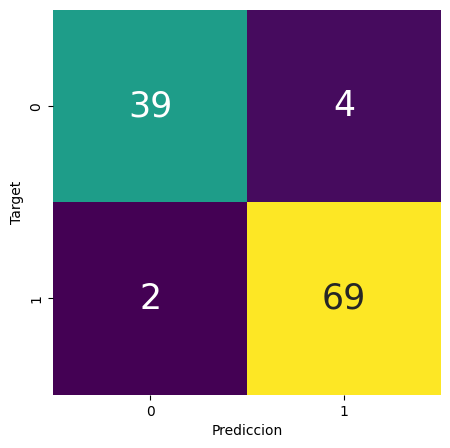

In [16]:
cm=confusion_matrix(y_test, predictions)

# convert the ndarray to a pandas dataframe
cm_df = pd.DataFrame(cm)
# set the size of the figure
plt.figure(figsize = (5,5))
sns.heatmap(cm_df,
           annot=True, annot_kws={"size": 25},
           fmt="d",         # decimals format
           xticklabels=True,
           yticklabels=True,
           cmap="viridis",
           cbar=False)
plt.xlabel('Prediccion')
plt.ylabel('Target')

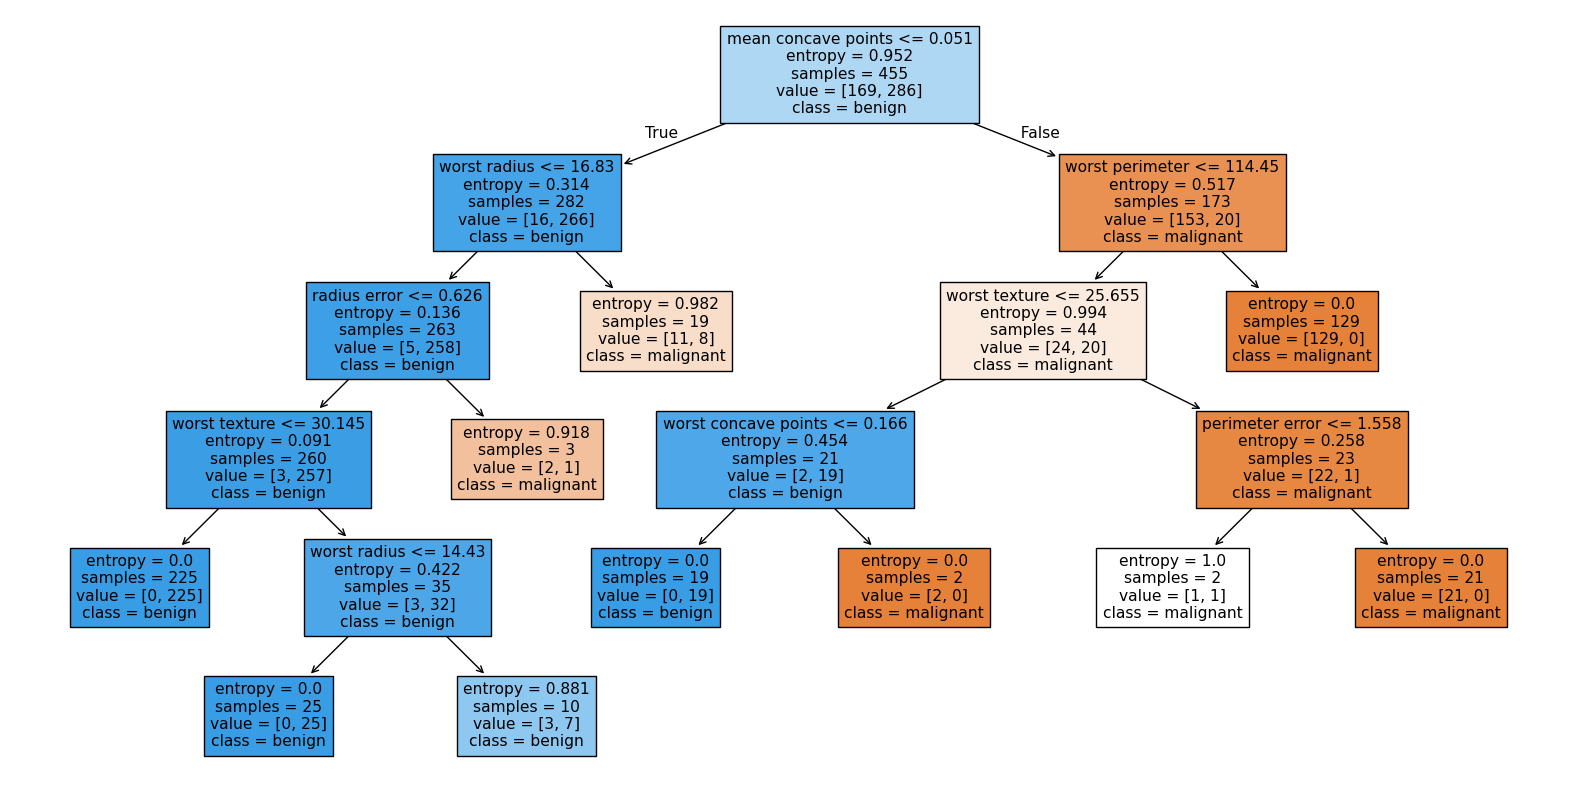

In [11]:
# Visualizar el árbol de decisión
plt.figure(figsize=(20,10))
tree.plot_tree(cart_model, filled=True, feature_names=breast_cancer.feature_names, class_names=breast_cancer.target_names)
plt.show()

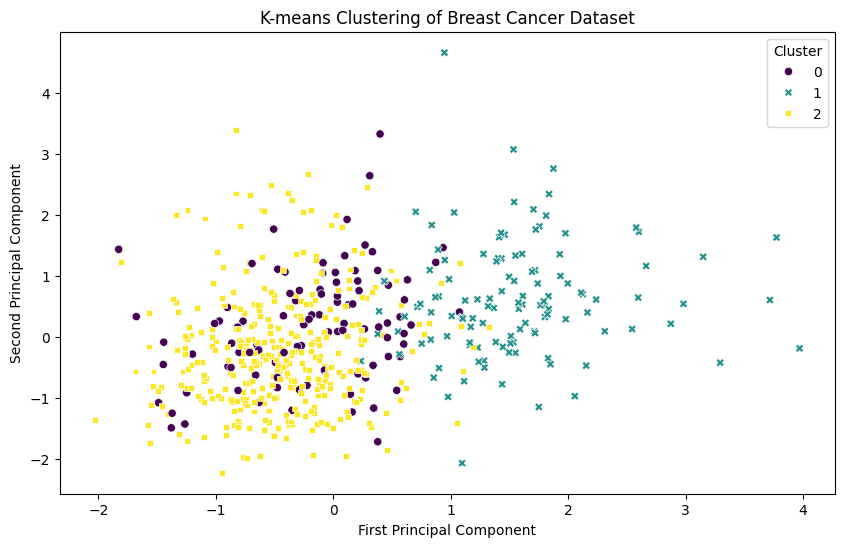

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Cargar datos
data = load_breast_cancer()
X = data.data

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar K-means
# Configurar el número de clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Obtener las etiquetas de los clusters generadas por K-means
clusters = kmeans.labels_

# Visualización de los clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=clusters, palette="viridis", style=clusters)
plt.title('K-means Clustering of Breast Cancer Dataset')
plt.xlabel('First Principal Component')  # Asumiendo que estas son componentes principales
plt.ylabel('Second Principal Component')
plt.legend(title='Cluster')
plt.show()

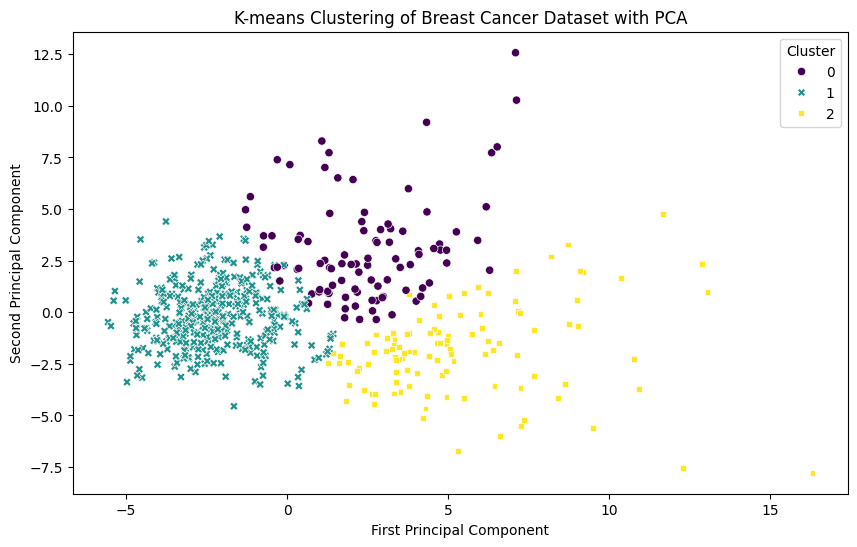

In [24]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Cargar datos
data = load_breast_cancer()
X = data.data

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# Aplicar K-means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_pca)

# Obtener las etiquetas de los clusters generadas por K-means
clusters = kmeans.labels_

# Visualización de los clusters usando PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette="viridis", style=clusters)
plt.title('K-means Clustering of Breast Cancer Dataset with PCA')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend(title='Cluster')
plt.show()


In [27]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
# Calcular métricas
labels = kmeans.fit_predict(X)
silhouette = silhouette_score(X, labels)
davies_bouldin = davies_bouldin_score(X, labels)
calinski_harabasz = calinski_harabasz_score(X, labels)

print(f"Silhouette Score: {silhouette}")
print(f"Davies-Bouldin Score: {davies_bouldin}")
print(f"Calinski-Harabasz Score: {calinski_harabasz}")

Silhouette Score: 0.6467642159647962
Davies-Bouldin Score: 0.6329049500623068
Calinski-Harabasz Score: 1246.2607584127322


#K-Means

Es un algoritmo de Custering del tipo no supervisado. El objetivo de este algoritmo es encontrar “K” grupos (clusters) dentro de nuestros datos.

El algoritmo trabaja iterativamente para incluir a cada ejemplo de nuestra base de datos dentro de uno de los “K” grupos basado en la similitud de sus atributos.

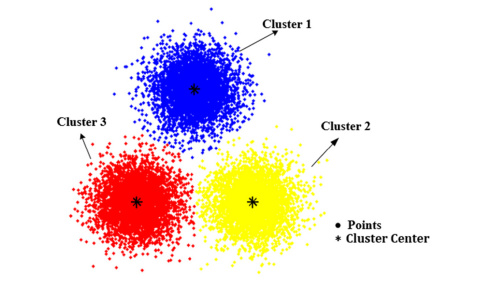

In [29]:
import cv2
from google.colab.patches import cv2_imshow

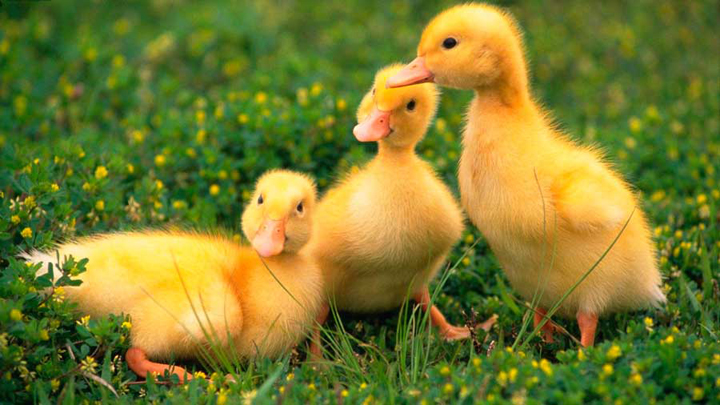

(405, 720, 3)

In [31]:
patos = cv2.imread('/content/drive/MyDrive/Inteligencia Artificial/Materia/2025/patos.png')

cv2_imshow(patos)
patos.shape

Una imagen digital es una representación bidimensional de una imagen a partir de una matriz numérica

Las imágenes digitales están conformadas por píxeles (elementos de la matriz), y los píxeles están formados por las combinaciones de colores primarios (imágenes RGB).

Podemos pensar a un canal en este contexto, como una copia de la imagen del mismo tamaño que la imágen original, donde el valor de cada uno de sus pixels define la intensidad del color.

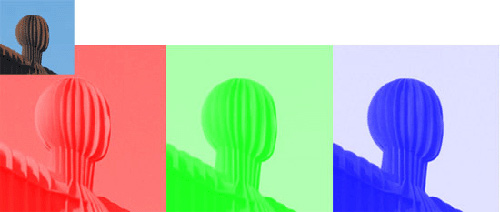

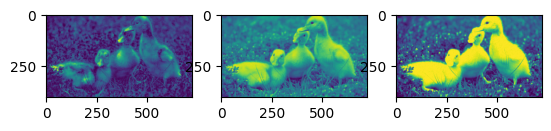

In [32]:
from matplotlib import pyplot as plt

fig, axs = plt.subplots(nrows=1, ncols=3)
channel_red = patos[:,:,2]
channel_green = patos[:,:,1]
channel_blue = patos[:,:,0]
axs[0].imshow(channel_blue)
axs[1].imshow(channel_green)
axs[2].imshow(channel_red)
plt.show()

##Creando la base de datos

In [33]:
dimensiones = patos.shape
pixels = dimensiones[0]*dimensiones[1]
pixels

291600

In [34]:
import numpy as np
pixels= np.zeros([pixels,3], dtype='int')
pixels

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       ...,
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

In [35]:
for fila in range(dimensiones[0]):
  for columna in range(dimensiones[1]):
    pixels[fila*dimensiones[1]+columna,0:3]=patos[fila,columna,:]
pixels

array([[14, 55, 24],
       [24, 67, 34],
       [19, 66, 28],
       ...,
       [22, 76, 16],
       [15, 69,  9],
       [ 9, 62,  5]])

#[Pandas ](https://pandas.pydata.org/)
Es una libreria que depende de de Numpy, esta librería añade un potente manejo matricial a Python. Los principales tipos de datos que pueden representarse con pandas son:
- Datos tabulares con columnas de tipo heterogéneo con etiquetas en columnas y filas.
-Series temporales.

Pandas proporciona herramientas que permiten:
- Leer y escribir datos en diferentes formatos: CSV, Microsoft Excel, bases SQL y formato HDF5
- Seleccionar y filtrar de manera sencilla tablas de datos en función de posición, valor o etiquetas
- Fusionar y unir datos
transformar datos aplicando funciones tanto en global como por ventanas
- Manipulación de series temporales
- Realizar gráficas

In [36]:
import pandas as pd
pixels_df = pd.DataFrame(pixels, columns=['blue', 'green', 'red'])
pixels_df

,blue,green,red
0,14,55,24
1,24,67,34
2,19,66,28
3,13,62,18
4,20,71,21
...,...,...,...
291595,22,73,16
291596,25,76,19
291597,22,76,16
291598,15,69,9


In [38]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(pixels_df)
pixels_clusters = pixels_df.copy()
pixels_clusters['kmeans_group']=kmeans.labels_
pixels_clusters

,blue,green,red,kmeans_group
0,14,55,24,1
1,24,67,34,1
2,19,66,28,1
3,13,62,18,1
4,20,71,21,1
...,...,...,...,...
291595,22,73,16,1
291596,25,76,19,1
291597,22,76,16,1
291598,15,69,9,1


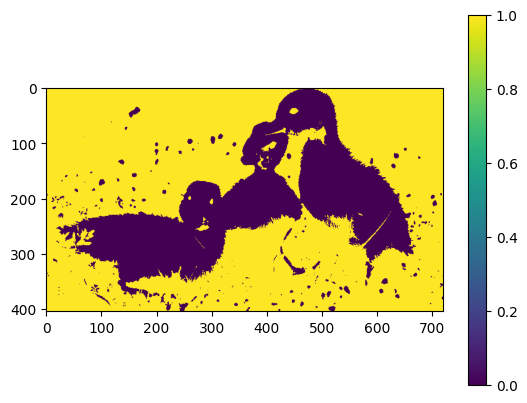

In [39]:
a= patos.shape

clasif_patos= kmeans.labels_.reshape(a[0],a[1])

plt.imshow(clasif_patos)
plt.colorbar()
plt.show()